In [2]:
import pandas as pd

# Step 1: Load CSV and preview
df_raw = pd.read_csv("C:/Users/pooja/Personal Projects/FoodPriceAnalytics/food_prices.csv", skiprows=4)
print("Step 1 - Raw Data:\n", df_raw.head())

# Step 2: Rename first column
df_raw.rename(columns={df_raw.columns[0]: "State"}, inplace=True)

# Step 3: Drop any rows where State is null (to remove footer or bad rows)
df_raw = df_raw[df_raw['State'].notna()]
print("\nStep 3 - Cleaned Rows:\n", df_raw.head())

# Step 4: Melt the dataframe to long format
df_long = pd.melt(df_raw, id_vars=["State"], var_name="Commodity", value_name="Price")
print("\nStep 4 - Long Format:\n", df_long.head(10))

# Step 5: Remove any rows where price is null or 0
df_long = df_long[df_long["Price"].notna()]
df_long = df_long[df_long["Price"] != 0]
print("\nStep 5 - Final Cleaned Data:\n", df_long.head(10))

# Optional: Save cleaned file
df_long.to_csv("cleaned_food_prices.csv", index=False)
print("\n✅ Cleaned data saved to 'cleaned_food_prices.csv'")


Step 1 - Raw Data:
            Modal Price   40.0   28.0   35.0    80.0   120.0  120.0.1   110.0  \
0  Andaman and Nicobar  54.00    NaN  63.67  104.67  134.67   137.33  124.33   
1       Andhra Pradesh  48.88  44.22  47.12   82.29  107.50   108.13  108.94   
2    Arunachal pradesh  42.50  45.00  45.25   96.00  136.75   130.75  119.00   
3                Assam  39.43  35.80  39.50   86.82  121.57   102.65  109.46   
4                Bihar  37.69  28.75  34.64   81.47  117.64   113.06  108.86   

    90.0   45.0  ...   149.5   154.0   159.0   131.5   50.0   240.0   20.0  \
0  98.67  55.67  ...  200.00     NaN  166.67  149.67  77.00  341.00  20.33   
1  87.88  44.50  ...  146.00  153.00  159.69  125.27  56.06  290.24  19.47   
2  95.25  53.75  ...  153.67  162.25  170.25     NaN  86.00  354.25  17.75   
3  88.29  48.11  ...  160.05  151.04  171.43  141.11  61.54  251.54  11.71   
4  79.56  45.80  ...  155.31  154.70  168.96  128.55  48.74  274.66  24.03   

   20.0.1   25.0  40.0.1  
0  

In [5]:
import pandas as pd

# Step 1: Load the CSV without headers
df = pd.read_csv("C:/Users/pooja/Personal Projects/FoodPriceAnalytics/food_prices.csv", header=None)
print("Raw shape:", df.shape)

# Step 2: Extract header row (index 0) and set as columns
columns = df.iloc[0].tolist()
df.columns = columns

# Step 3: Remove the first row (which was header)
df = df[1:].reset_index(drop=True)

# Step 4: Extract price type rows (first 4 rows)
price_type_rows = df.iloc[0:4].copy()
price_type_rows["States/UTs"] = ["Average Price", "Maximum Price", "Minimum Price", "Modal Price"]

# Step 5: Extract state-wise data (row 4 onwards)
state_data = df.iloc[4:].copy()

# Step 6: Melt the price type rows
df_prices = price_type_rows.melt(id_vars="States/UTs", var_name="Commodity", value_name="Price")
df_prices.rename(columns={"States/UTs": "Price Type"}, inplace=True)

# Step 7: Melt state data
df_states = state_data.melt(id_vars="States/UTs", var_name="Commodity", value_name="Price")
df_states["Price Type"] = "Reported"

# Step 8: Combine both
df_final = pd.concat([df_prices, df_states], ignore_index=True)

# Step 9: Reorder columns and convert price
df_final = df_final[["States/UTs", "Price Type", "Commodity", "Price"]]
df_final["Price"] = pd.to_numeric(df_final["Price"], errors="coerce")

# Step 10: Save
df_final.to_csv("final_cleaned_food_prices.csv", index=False)
print("✅ Saved as final_cleaned_food_prices.csv")

# Step 11: Print sample
print("\n🔍 Sample:")
print(df_final.head(10))


Raw shape: (38, 23)
✅ Saved as final_cleaned_food_prices.csv

🔍 Sample:
  States/UTs     Price Type     Commodity  Price
0        NaN  Average Price          Rice  42.74
1        NaN  Maximum Price          Rice  63.00
2        NaN  Minimum Price          Rice  28.00
3        NaN    Modal Price          Rice  40.00
4        NaN  Average Price         Wheat  31.26
5        NaN  Maximum Price         Wheat  55.00
6        NaN  Minimum Price         Wheat  23.00
7        NaN    Modal Price         Wheat  28.00
8        NaN  Average Price  Atta (Wheat)  36.62
9        NaN  Maximum Price  Atta (Wheat)  71.00


In [15]:
import pandas as pd

# Step 1: Load the raw CSV
df = pd.read_csv("C:/Users/pooja/Personal Projects/FoodPriceAnalytics/food_prices.csv", header=None)
print("Raw shape:", df_raw.shape)

# Step 2: Extract header row and set columns
columns = df_raw.iloc[0].tolist()
df_raw.columns = columns
df = df_raw[1:].reset_index(drop=True)

# Step 3: First 4 rows are price types
price_rows = df.iloc[0:4].copy()
price_rows.index = ["Average Price", "Maximum Price", "Minimum Price", "Modal Price"]

# Drop 'States/UTs' column from price_rows (it contains NaN or duplicates)
price_rows = price_rows.drop(columns="States/UTs")

# Step 4: Melt price rows
df_price_types = price_rows.transpose().reset_index()
df_price_types.columns = ["Commodity", "Average Price", "Maximum Price", "Minimum Price", "Modal Price"]

# Melt to long format
df_price_melted = df_price_types.melt(id_vars="Commodity", var_name="Price Type", value_name="Price")
df_price_melted["States/UTs"] = "PAN India"

# Step 5: Get state-wise data
df_states = df.iloc[4:].copy()

# Melt state rows
df_state_melted = df_states.melt(id_vars="States/UTs", var_name="Commodity", value_name="Price")
df_state_melted["Price Type"] = "Reported"

# Step 6: Combine both
df_final = pd.concat([
    df_price_melted[["States/UTs", "Price Type", "Commodity", "Price"]],
    df_state_melted[["States/UTs", "Price Type", "Commodity", "Price"]]
], ignore_index=True)

# Convert Price to numeric
df_final["Price"] = pd.to_numeric(df_final["Price"], errors="coerce")

# Save cleaned CSV
df_final.to_csv("final_cleaned_food_prices.csv", index=False)
print("✅ Saved cleaned CSV as 'final_cleaned_food_prices.csv'")

# Print sample
print("\n🔍 Sample data:")
print(df_final.head(10))


Raw shape: (38, 23)
✅ Saved cleaned CSV as 'final_cleaned_food_prices.csv'

🔍 Sample data:
  States/UTs     Price Type      Commodity   Price
0  PAN India  Average Price           Rice   42.74
1  PAN India  Average Price          Wheat   31.26
2  PAN India  Average Price   Atta (Wheat)   36.62
3  PAN India  Average Price       Gram Dal   86.19
4  PAN India  Average Price  Tur/Arhar Dal  120.38
5  PAN India  Average Price       Urad Dal  115.33
6  PAN India  Average Price      Moong Dal  110.77
7  PAN India  Average Price     Masoor Dal   88.34
8  PAN India  Average Price          Sugar   45.95
9  PAN India  Average Price         Milk @   59.22


In [25]:
print("Columns in cleaned DataFrame:", df.columns)
print(df.head(3))  # peek at data


Columns in cleaned DataFrame: Index(['States/UTs', 'Rice', 'Wheat', 'Atta (Wheat)', 'Gram Dal',
       'Tur/Arhar Dal', 'Urad Dal', 'Moong Dal', 'Masoor Dal', 'Sugar',
       'Milk @', 'Groundnut Oil (Packed)', 'Mustard Oil (Packed)',
       'Vanaspati (Packed)', 'Soya Oil (Packed)', 'Sunflower Oil (Packed)',
       'Palm Oil (Packed)', 'Gur', 'Tea Loose', 'Salt Pack (Iodised)',
       'Potato', 'Onion', 'Tomato'],
      dtype='object')
      States/UTs   Rice  Wheat Atta (Wheat) Gram Dal Tur/Arhar Dal Urad Dal  \
0  Average Price  42.74  31.26        36.62    86.19        120.38   115.33   
1  Maximum Price   63.0   55.0         71.0    140.0         183.0    170.0   
2  Minimum Price   28.0   23.0         28.0     68.0          90.0     83.0   

  Moong Dal Masoor Dal  Sugar  ... Vanaspati (Packed) Soya Oil (Packed)  \
0    110.77      88.34  45.95  ...             156.48            146.67   
1     148.0      130.0   60.0  ...              231.0             198.0   
2      81.0      

In [26]:
import pandas as pd

# Load original CSV
df_raw = pd.read_csv("C:/Users/pooja/Personal Projects/FoodPriceAnalytics/food_prices.csv")

# Step 1: Set first column as index (contains 'Average Price', etc.)
df_fixed = df_raw.set_index('States/UTs')

# Step 2: Transpose — this will make states the rows
df_transposed = df_fixed.transpose().reset_index()
df_transposed = df_transposed.rename(columns={'index': 'Commodity'})

# Step 3: Melt to long format
df_long = df_transposed.melt(id_vars='Commodity', var_name='Price Type', value_name='Price')

# Step 4: Optional — reorder and clean
df_long = df_long[['Price Type', 'Commodity', 'Price']]
df_long = df_long.dropna()

print(df_long.head(10))


      Price Type      Commodity   Price
0  Average Price           Rice   42.74
1  Average Price          Wheat   31.26
2  Average Price   Atta (Wheat)   36.62
3  Average Price       Gram Dal   86.19
4  Average Price  Tur/Arhar Dal  120.38
5  Average Price       Urad Dal  115.33
6  Average Price      Moong Dal  110.77
7  Average Price     Masoor Dal   88.34
8  Average Price          Sugar   45.95
9  Average Price         Milk @   59.22


In [20]:
print(df.columns.tolist())

['States/UTs', 'Rice', 'Wheat', 'Atta (Wheat)', 'Gram Dal', 'Tur/Arhar Dal', 'Urad Dal', 'Moong Dal', 'Masoor Dal', 'Sugar', 'Milk @', 'Groundnut Oil (Packed)', 'Mustard Oil (Packed)', 'Vanaspati (Packed)', 'Soya Oil (Packed)', 'Sunflower Oil (Packed)', 'Palm Oil (Packed)', 'Gur', 'Tea Loose', 'Salt Pack (Iodised)', 'Potato', 'Onion', 'Tomato']


In [27]:
top5 = df_long[df_long['Price Type'] == 'Average Price']\
         .sort_values(by='Price', ascending=False).head(5)
print(top5)


       Price Type               Commodity   Price
17  Average Price               Tea Loose  271.87
10  Average Price  Groundnut Oil (Packed)  188.43
11  Average Price    Mustard Oil (Packed)  178.78
14  Average Price  Sunflower Oil (Packed)  160.33
12  Average Price      Vanaspati (Packed)  156.48


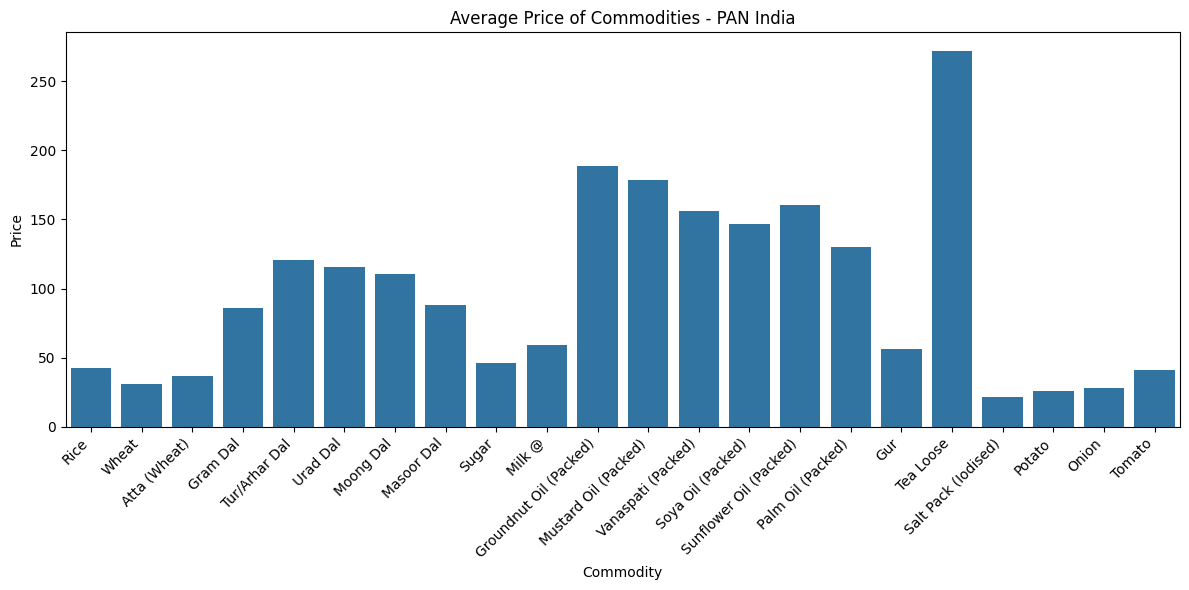

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=df_long[df_long['Price Type']=='Average Price'], 
            x='Commodity', y='Price')
plt.xticks(rotation=45, ha='right')
plt.title("Average Price of Commodities - PAN India")
plt.tight_layout()
plt.show()


<Axes: xlabel='Price Type', ylabel='Commodity'>

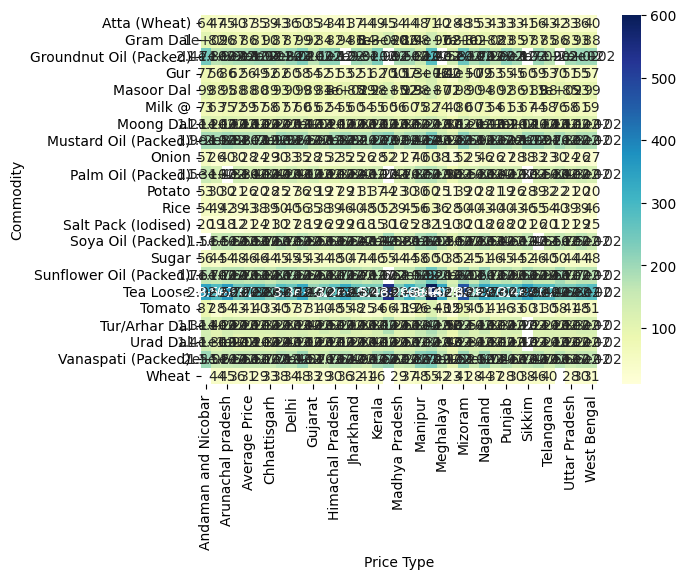

In [23]:
pivot = df_long.pivot(index='Commodity', columns='Price Type', values='Price')
sns.heatmap(pivot, annot=True, cmap='YlGnBu')


In [32]:
import pandas as pd

# Load original CSV
df = pd.read_csv("C:/Users/pooja/Personal Projects/FoodPriceAnalytics/food_prices.csv")

# Fill NaN in 'States/UTs' with forward fill
df['States/UTs'] = df['States/UTs'].ffill()


# Separate national-level price types (first few rows) from state-wise prices
price_types = ['Average Price', 'Maximum Price', 'Minimum Price', 'Modal Price']
df_price_types = df[df['States/UTs'].isin(price_types)].copy()
df_price_types['States/UTs'] = 'All India'
df_price_types['Price Type'] = df_price_types.index.map(lambda i: df.iloc[i, 0])

# Now handle state-level prices
df_states = df[~df['States/UTs'].isin(price_types)].copy()
df_states['Price Type'] = 'Reported'

# Combine both
df_combined = pd.concat([df_price_types, df_states], ignore_index=True)

# Drop old index column if present
df_combined = df_combined.drop(columns=['States/UTs.1'], errors='ignore')  # ignore in case it doesn't exist

# Now melt into long format
df_melted = df_combined.melt(
    id_vars=['States/UTs', 'Price Type'],
    var_name='Commodity',
    value_name='Price'
)

# Final cleaned DataFrame
df_cleaned = df_melted.copy()


In [36]:
top5_rows = reported_df.sort_values(by='Price', ascending=False).head(5)
print(top5_rows)


              States/UTs Price Type  Commodity   Price
649               Ladakh   Reported  Tea Loose  540.00
654              Mizoram   Reported  Tea Loose  465.73
635    Arunachal pradesh   Reported  Tea Loose  354.25
659               Sikkim   Reported  Tea Loose  341.67
633  Andaman and Nicobar   Reported  Tea Loose  341.00


In [40]:
# Save cleaned data to CSV
df_long.to_csv(r"C:\Users\pooja\Cleaned_Food_Prices.csv", index=False)


In [43]:
###“Here are the top items driving up average household food expenses…”

C:\Users\pooja\AppData\Local\Temp\ipykernel_25572\3385155488.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_prices_sorted, x='Commodity', y='Price', palette='viridis')


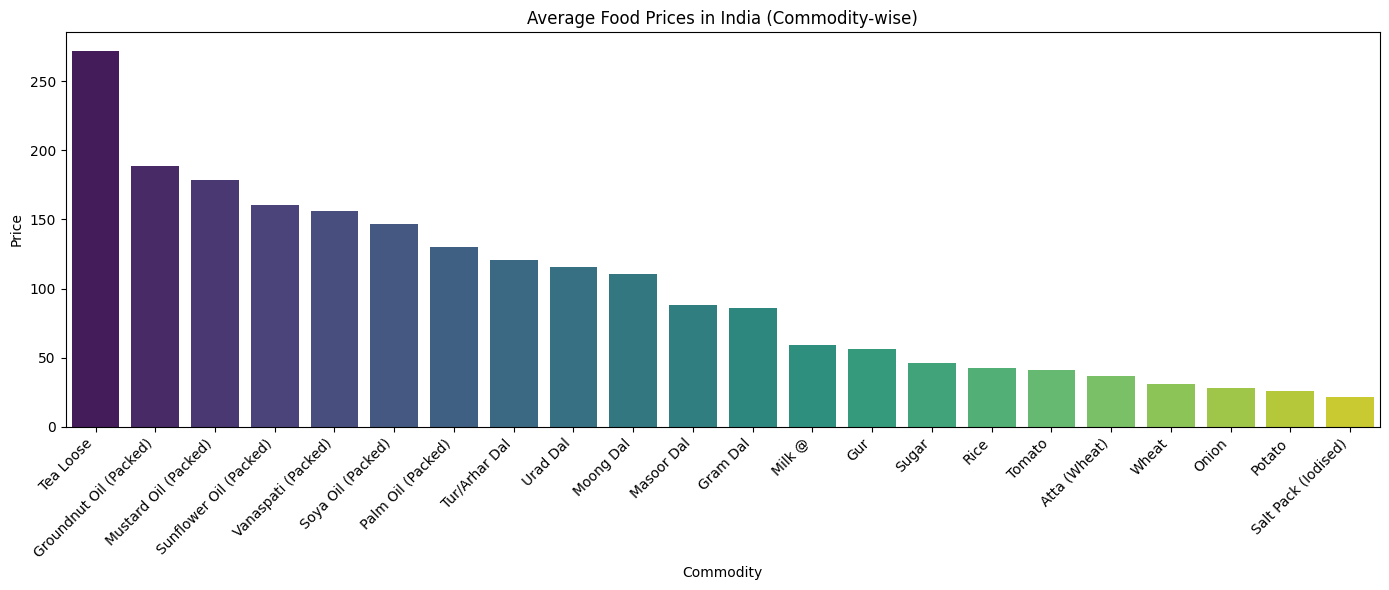

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only Average Prices
avg_prices = df_long[df_long['Price Type'] == 'Average Price']

# Sort by price
avg_prices_sorted = avg_prices.sort_values(by='Price', ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(data=avg_prices_sorted, x='Commodity', y='Price', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Average Food Prices in India (Commodity-wise)')
plt.tight_layout()
plt.show()


C:\Users\pooja\AppData\Local\Temp\ipykernel_25572\3621641620.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_fluctuation.index, y=top_fluctuation['Price Range'], palette='rocket')


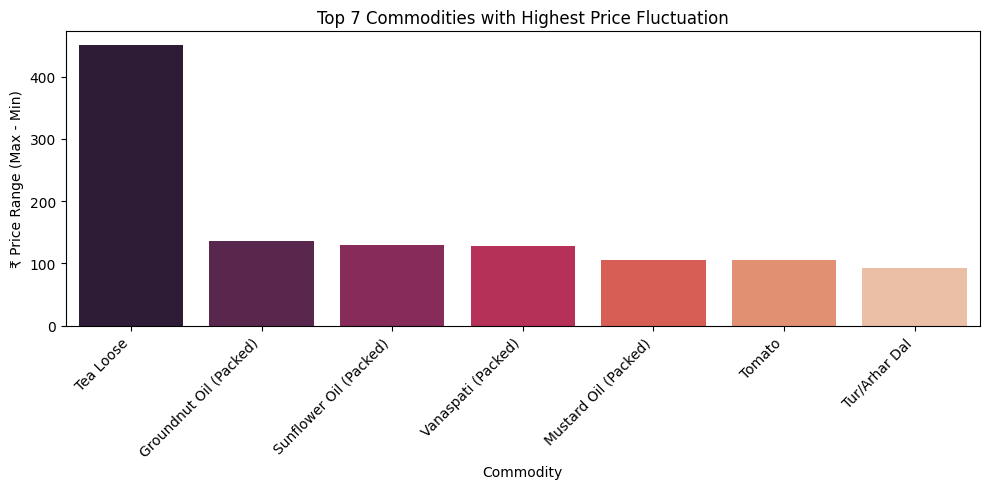

In [44]:
# Create pivot table to compute max - min price range
price_pivot = df_long.pivot(index='Commodity', columns='Price Type', values='Price')
price_pivot['Price Range'] = price_pivot['Maximum Price'] - price_pivot['Minimum Price']

# Sort by highest price range
top_fluctuation = price_pivot.sort_values(by='Price Range', ascending=False).head(7)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_fluctuation.index, y=top_fluctuation['Price Range'], palette='rocket')
plt.title('Top 7 Commodities with Highest Price Fluctuation')
plt.ylabel('₹ Price Range (Max - Min)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [45]:
df_long.to_csv(r"C:\Users\pooja\Cleaned_FoodPrices_India.csv", index=False)
